# **Atharva Bhavkar**

# **GRIP: The Sparks Foundation**

# **Task1: Prediction using Unsupervised ML**

**Dataset used -> Iris (Dataset which is available freely in sklearn library).**

**Problem Statement: Predict the optimum number of clusters and represent it visually.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# dropping the Id Column 
df.drop(['Id'],inplace=True,axis=1)

In [9]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
print(df.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
print(df.duplicated().sum())

3


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape[0]

147

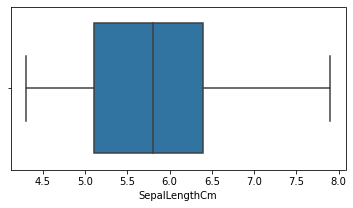

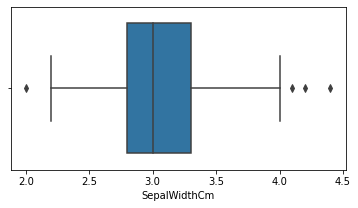

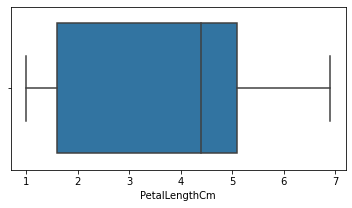

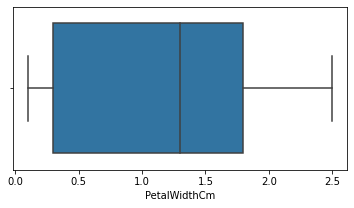

In [14]:
for i in df.columns:
    if df[i].dtype == 'float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])

In [15]:
Q1=df['SepalWidthCm'].quantile(0.25)
Q3=df['SepalWidthCm'].quantile(0.75)
IQR=Q3-Q1

In [16]:
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)

df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)

<AxesSubplot:xlabel='SepalWidthCm'>

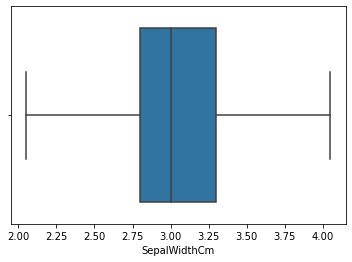

In [17]:
sns.boxplot(df['SepalWidthCm'])

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


<AxesSubplot:xlabel='Species', ylabel='count'>

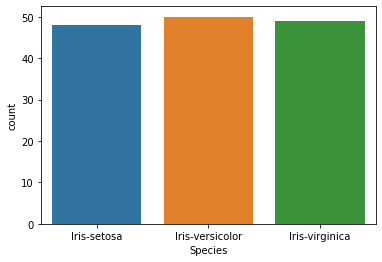

In [18]:
print(df.Species.value_counts())
sns.countplot(df['Species'])

In [19]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [21]:
df.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

In [22]:
corr=df.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


<AxesSubplot:>

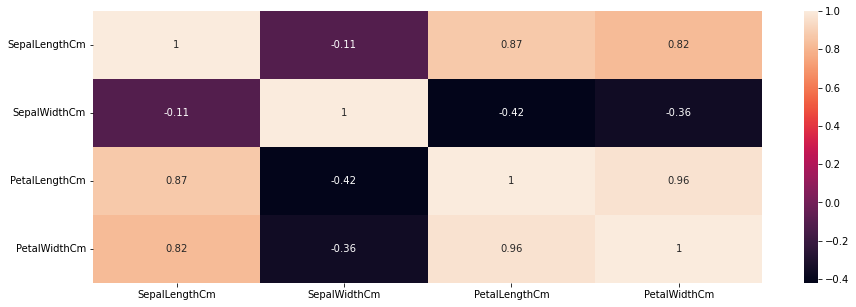

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True)

# **K-Means Clustering**

In [24]:
from sklearn.cluster import KMeans

In [25]:
SSE=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,n_jobs=1)
    kmeans.fit(df.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

In [26]:
SSE

[662.5493197278907,
 150.78429381127447,
 77.01300425115039,
 55.74678285256411,
 44.92439484649123,
 37.74708251183517,
 33.4803201058201,
 29.166908754916125,
 27.29381071570043]

Text(0.5, 1.0, "'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")

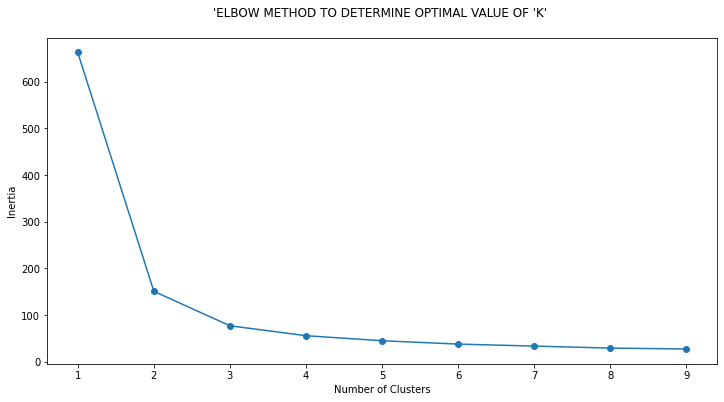

In [27]:
d = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(d['Cluster'],d['SSE'],marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")

In [28]:
kmeans = KMeans(n_jobs=-1, n_clusters=3)
kmeans.fit(df.iloc[: ,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

In [29]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2])

In [30]:
df['cluster']=kmeans.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1
148,6.2,3.4,5.4,2.3,Iris-virginica,1


In [31]:
display(df['cluster'].value_counts(), df['Species'].value_counts())

2    61
0    48
1    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

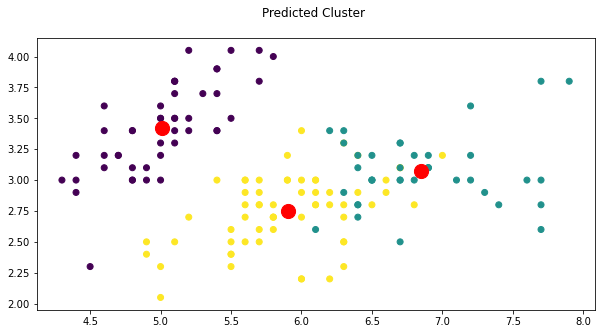

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df.cluster)
plt.title("Predicted Cluster \n")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label='Centroids')
plt.show()

In [33]:
df.loc[df['Species']=='Iris-setosa']['cluster'].value_counts() # the model has identified iris-setosa with 100% accuracy

0    48
Name: cluster, dtype: int64

In [34]:
df.loc[df['Species']=='Iris-virginica']['cluster'].value_counts()

1    36
2    13
Name: cluster, dtype: int64

In [35]:
df['Species-encoded'] = df['Species'].apply(lambda x : 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species-encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,0,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,1,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,1,2
148,6.2,3.4,5.4,2.3,Iris-virginica,1,2


*Analysing accuracy*

<AxesSubplot:>

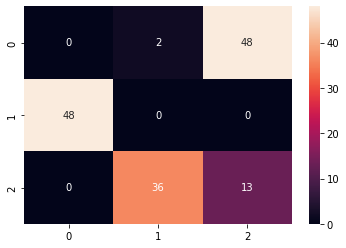

In [36]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(df['Species-encoded'],df['cluster']),annot=True)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(df['Species-encoded'],df['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        48
           2       0.21      0.27      0.24        49

    accuracy                           0.09       147
   macro avg       0.07      0.09      0.08       147
weighted avg       0.07      0.09      0.08       147

